# ✤ Full Analysis World Suicide Rates with Data Preparation, Preprocessing using Normalisation/Standartisation and Comparison of Machine Learning Models ✤



### Task:
+ Make a preprocessing with your own dataset and answer the followinng questions:
+ "what (intro), why ( methods ) , how ( by fxns or manually) "   
+ the comparison resullts of  the models  ( regression /classification / clustering) with preprocessing ( at least 2 different method)  and without preprocessing.

# ✤ Analysis of Worldwide Suicide Rates
### ✤ Introduction

&emsp; According to this dataset of Global Suicide Rates , people of different ages have committed suicides because of pressure, barriers, or a lack of mental healthcare across all countries. In addition, in this analysis I am going to compare the prediction of the  suicides number depending on different age groups, genders, generations, countries, and ratio of suicides per 100k population over period of 1985 and 2015 years.

&emsp;  Suicide takes place throughout the life and it has been one of the leading causes of death in many countries. Unfortunately, each suicide is a tragic loss of human's life that has own consequences on people left apart, like family and friends.

 &emsp;  The goal of the Global Suicide Rates analysis is to demonstrate statistics of 27 820 observations, which grouped by certain age ranges, gender(male/female), number of suicides, population of country, GDP (gross domestic product) per year and person, HDI (human development index) different generations during the period of 1985 & 2015 across the world. In addition, we will find which factors had more influence on the number of suicides in 101 countries.


My analysis will be based on dataset during the 30 years, because I found this great dataset on Kaggle website=> 
+ https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [ ]:
#Importing 'must-have' Libraries like these:

import numpy as np  # to access data in any formats.
import pandas as pd  # to work with data frame formats.
import seaborn as sns  # to load color themes in graphics
import matplotlib.pyplot as plt  # to plot data
import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#observing my dataset from 'suicide' csv file:
data = pd.read_excel('suicide-excel.xls')

In [ ]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('$', '')

In [ ]:
#by using rename() function:
data.rename(columns={'sex':'gender'},inplace=True)

In [ ]:
data

,country,year,gender,age,suicides_no,population,suicides/100kpop,country-year,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


**✤  From results of dataset, I can count total number of rows & columns, with shape function :**

In [ ]:
print(data.shape)

(27820, 12)


#  ✤  Data preparation: cleaning and shaping

✤ In this dataset,as you noticed from last 5 rows in table,there is no rows with data in 2016 year, because it is incomplete for some countries. So,I want to delete data related to this year (2016):

In [ ]:
data = data[data['year'] != 2016]
# removing specific values in a dataframe

In [ ]:
data.shape

(27660, 12)

In [ ]:
# deleting unneeded columns:
#data.drop(['country-year'], inplace=True)
data.drop('country-year', axis=1, inplace=True)

**✤ As you can see from initial 5 rows of table, there are null values(NaN) in HDI column, and we should guess all other missing values from table:**

In [ ]:
# by using isnull() function and we count empty values in columns:
data.isnull().sum()

country                 0
year                    0
gender                  0
age                     0
suicides_no             0
population              0
suicides/100kpop        0
hdiforyear          19296
gdp_for_year            0
gdp_per_capita          0
generation              0
dtype: int64

**✤ Only 'HDI_for_year' column has missing rows- 19456 out of 27820 rows, it is about 70% of observations missed, it means without any data.
Let's take a look on the values of this column:**

In [ ]:
# using of drop() function
data.drop('hdiforyear', axis=1, inplace=True)

In [ ]:
# again by using isnull() function and we count empty values in columns:
data.isnull().any()
# So, bollean "false" means that there is no null data:

country             False
year                False
gender              False
age                 False
suicides_no         False
population          False
suicides/100kpop    False
gdp_for_year        False
gdp_per_capita      False
generation          False
dtype: bool

**✤  Additionally, we should know datatypes of our variables, it will help us in analysis:**
 + object-> categorical data
 + int64 -> numerical data 
 + float64-> numerical data 

In [ ]:
data.dtypes

country              object
year                  int64
gender               object
age                  object
suicides_no           int64
population            int64
suicides/100kpop    float64
gdp_for_year         object
gdp_per_capita        int64
generation           object
dtype: object

In [ ]:
columns = ['year', 'age', 'generation']
for col in columns:
    print("\n {}'s - Unique values : \n {}".format(col, data[col].unique()))


 year's - Unique values : 
 [1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011]

 age's - Unique values : 
 ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']

 generation's - Unique values : 
 ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


In [ ]:
print('Amount of different types of countries: ')
print(len(data['country'].unique())) 
#count them

distinct_countries = data['country'].unique()
print(distinct_countries) 
#show all of them

Amount of different types of countries: 
100
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway' 'Oman'
 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal' 'Puerto Rico'
 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapo

## ✤  Preparing a variables for 'Age- ranges':

In [ ]:
data['age'] = data['age'].str.replace('years','')

In [ ]:
data['age'].unique()

array(['15-24 ', '35-54 ', '75+ ', '25-34 ', '55-74 ', '5-14 '],
      dtype=object)

In [ ]:
# 1 => 5-14
# 2 => 15-24 
# 3 => 25-34
# 4 => 35-54 
# 5 => 55-74
# 6 => 75+

In [ ]:
data['age'] = data['age'].replace('5-14 ',1).replace('15-24 ',2).replace('25-34 ',3).replace('35-54 ',4).replace('55-74 ',5).replace('75+ ',6)

In [ ]:
data.head()

,country,year,gender,age,suicides_no,population,suicides/100kpop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,2,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,4,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,2,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,6,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,3,9,274300,3.28,"2,156,624,900",796,Boomers


## ✤  Preparing variables for 'Gender':
+ **In such way that [ Male is 1 and Female is 0]**

In [ ]:
data['gender'] = data['gender'].replace('male',1).replace('female',0)

In [ ]:
data.head()

,country,year,gender,age,suicides_no,population,suicides/100kpop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,1,2,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,1,4,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,0,2,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,1,6,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,1,3,9,274300,3.28,"2,156,624,900",796,Boomers


## ✤  Preparing a  variables for 'Generations' like 1-6:
 
 ✤ To start, I want to introduce all generations, by their birth years,:
 +  1 =>  'G.I. Generation' ==> Born 1901-1927 
 +  2 =>  'Silent' ==> Born 1928-1945 
 +  3 =>  'Boomers'- ==> Born 1946-1964 
 +  4 =>  'Generation X' ==> Born 1965-1980 
 +  5 =>  'Millenials' ==> Born 1981-1996 
 +  6 =>  'Generation Z' ==> Born 1997-2012 

In [ ]:
data['generation'] = data['generation'].replace('G.I. Generation',1).replace('Silent',2).replace('Boomers',3).replace('Generation X',4).replace('Millenials',5).replace('Generation Z',6)

In [ ]:
data.tail()

,country,year,gender,age,suicides_no,population,suicides/100kpop,gdp_for_year,gdp_per_capita,generation
27815,Uzbekistan,2014,0,4,107,3620833,2.96,"63,067,077,179",2309,4
27816,Uzbekistan,2014,0,6,9,348465,2.58,"63,067,077,179",2309,2
27817,Uzbekistan,2014,1,1,60,2762158,2.17,"63,067,077,179",2309,6
27818,Uzbekistan,2014,0,1,44,2631600,1.67,"63,067,077,179",2309,6
27819,Uzbekistan,2014,0,5,21,1438935,1.46,"63,067,077,179",2309,3


### ✤ Preparing a variables for 'Gdp_for_Year' 

In [ ]:
data['gdp_for_year'] = data['gdp_for_year'].apply(lambda val: val.replace(',', ''))
data['gdp_for_year'] = pd.to_numeric(data['gdp_for_year'])

**✤ I decided to drop catgorical column and ratio column:**

In [ ]:
data.drop('country', axis=1, inplace=True)

In [ ]:
data.drop('suicides/100kpop', axis=1, inplace=True)

In [ ]:
data.shape

(27660, 8)

In [ ]:
# HERE IS MY FINAL DATASET:
data

,year,gender,age,suicides_no,population,gdp_for_year,gdp_per_capita,generation
0,1987,1,2,21,312900,2156624900,796,4
1,1987,1,4,16,308000,2156624900,796,2
2,1987,0,2,14,289700,2156624900,796,4
3,1987,1,6,1,21800,2156624900,796,1
4,1987,1,3,9,274300,2156624900,796,3
...,...,...,...,...,...,...,...,...
27815,2014,0,4,107,3620833,63067077179,2309,4
27816,2014,0,6,9,348465,63067077179,2309,2
27817,2014,1,1,60,2762158,63067077179,2309,6
27818,2014,0,1,44,2631600,63067077179,2309,6


In [ ]:
# ALL DATATYPES ARE INTEGERS:
data.dtypes

year              int64
gender            int64
age               int64
suicides_no       int64
population        int64
gdp_for_year      int64
gdp_per_capita    int64
generation        int64
dtype: object

### ✤ SAVING MY NEW dataset into excel file:

In [ ]:
data.to_excel("NEW-suicide.xlsx")

In [ ]:
new_data = pd.read_excel('NEW-suicide.xlsx')

**✤  Also, there is a Statistical description of my dataset, it illustrates a fairly wide range of data such as total amount, average mean value, standard deviation, interqurtile range and min/max values:**

In [ ]:
new_data.describe()

,year,gender,age,suicides_no,population,gdp_for_year,gdp_per_capita,generation
count,27660.000000,27660.000000,27660.000000,27660.000000,2.766000e+04,2.766000e+04,27660.000000,27660.000000
mean,2001.173102,0.500000,3.500000,243.413485,1.850689e+06,4.471009e+11,16815.568330,3.380550
std,8.418754,0.500009,1.707856,904.490185,3.920658e+06,1.457574e+12,18861.585497,1.423265
min,1985.000000,0.000000,1.000000,0.000000,2.780000e+02,4.691962e+07,251.000000,1.000000
25%,1994.000000,0.000000,2.000000,3.000000,9.753525e+04,8.976208e+09,3436.000000,2.000000
50%,2002.000000,0.500000,3.500000,25.000000,4.307250e+05,4.801361e+10,9283.000000,3.000000
75%,2008.000000,1.000000,5.000000,132.000000,1.491041e+06,2.602024e+11,24796.000000,5.000000
max,2015.000000,1.000000,6.000000,22338.000000,4.380521e+07,1.812071e+13,126352.000000,6.000000


## ✤  Creating new dataset with Dummy variables  for Age and Generaions: ✤

In [ ]:
final_df = pd.get_dummies(new_data, columns=["age", "generation"])
final_df.head()

,year,gender,suicides_no,population,gdp_for_year,gdp_per_capita,age_1,age_2,age_3,age_4,age_5,age_6,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6
0,1987,1,21,312900,2156624900,796,0,1,0,0,0,0,0,0,0,1,0,0
1,1987,1,16,308000,2156624900,796,0,0,0,1,0,0,0,1,0,0,0,0
2,1987,0,14,289700,2156624900,796,0,1,0,0,0,0,0,0,0,1,0,0
3,1987,1,1,21800,2156624900,796,0,0,0,0,0,1,1,0,0,0,0,0
4,1987,1,9,274300,2156624900,796,0,0,1,0,0,0,0,0,1,0,0,0


#  ✤  Data Preprocessing: ✤ Normalisation and Standartisation ✤

## ✤ YEAR normalisation:  => X-min/(max-min)

In [ ]:
miny = new_data['year'].min(skipna = True)
print("The Minimum is ", miny)

maxy = new_data['year'].max(skipna = True)
print("The Maximum is ", maxy)

print(20*'-')
print('The Max-Min', maxy-miny)

The Minimum is  1985
The Maximum is  2015
--------------------
The Max-Min 30


In [ ]:
# X-min/(max-min)
print((1987-1985)/30)
print((1990-1985)/30)
print((1995-1985)/30)
print((2000-1985)/30)
print((2005-1985)/30)
print((2010-1985)/30)
print((2014-1985)/30)

0.06666666666666667
0.16666666666666666
0.3333333333333333
0.5
0.6666666666666666
0.8333333333333334
0.9666666666666667


In [ ]:
# With Lbarary SKLEARN:
from sklearn import preprocessing

In [ ]:
# by using silearn library:
normalized_year = preprocessing.normalize([new_data['year']])
print(normalized_year)
# first is 1987 and last is for 2014:

[[0.00597012 0.00597012 0.00597012 ... 0.00605125 0.00605125 0.00605125]]


## ✤ AGE normalisation: 

In [ ]:
from sklearn.preprocessing import Normalizer

age = new_data['age'].to_numpy()

normage = Normalizer().fit([age])
normal = normage.transform([age])
normal

array([[0.00308787, 0.00617574, 0.00308787, ..., 0.00154393, 0.00154393,
        0.00771967]])

## ✤ Suicides_number Normalisation: 

In [ ]:
sn = new_data['suicides_no'].to_numpy()

norm_suicide = Normalizer().fit([sn])
suic_norm = norm_suicide.transform([sn])
print(suic_norm)

[[1.34807309e-04 1.02710331e-04 8.98715392e-05 ... 3.85163740e-04
  2.82453409e-04 1.34807309e-04]]


## ✤ Populations Normalisation: 

In [ ]:
sn = new_data['population'].to_numpy()

norm_pop = Normalizer().fit([sn])
people_norm = norm_pop.transform([sn])
print(people_norm)

[[0.00043396 0.00042716 0.00040178 ... 0.0038308  0.00364973 0.00199564]]


##  ✤  Data Preprocessing: ✤ Normalisation of Whole dataset: ✤

In [ ]:
import numpy as np  # to access data in any formats.
import pandas as pd  # to work with data frame formats.
import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.preprocessing import Normalizer
#importing Normalisation Library.

scaler = Normalizer().fit(new_data)
normalizeData = scaler.transform(new_data)
normalizeData = pd.DataFrame(normalizeData, index = new_data.index, columns = new_data.columns)
normalizeData

,year,gender,age,suicides_no,population,gdp_for_year,gdp_per_capita,generation
0,9.213470e-07,4.636875e-10,9.273750e-10,9.737437e-09,0.000145,1.0,3.690952e-07,1.854750e-09
1,9.213470e-07,4.636875e-10,1.854750e-09,7.419000e-09,0.000143,1.0,3.690952e-07,9.273750e-10
2,9.213470e-07,0.000000e+00,9.273750e-10,6.491625e-09,0.000134,1.0,3.690952e-07,1.854750e-09
3,9.213471e-07,4.636875e-10,2.782125e-09,4.636875e-10,0.000010,1.0,3.690952e-07,4.636875e-10
4,9.213470e-07,4.636875e-10,1.391062e-09,4.173187e-09,0.000127,1.0,3.690952e-07,1.391062e-09
...,...,...,...,...,...,...,...,...
27655,3.193425e-08,0.000000e+00,6.342453e-11,1.696606e-09,0.000057,1.0,3.661181e-08,6.342453e-11
27656,3.193425e-08,0.000000e+00,9.513680e-11,1.427052e-10,0.000006,1.0,3.661181e-08,3.171227e-11
27657,3.193425e-08,1.585613e-11,1.585613e-11,9.513680e-10,0.000044,1.0,3.661181e-08,9.513680e-11
27658,3.193425e-08,0.000000e+00,1.585613e-11,6.976699e-10,0.000042,1.0,3.661181e-08,9.513680e-11


##  ✤  Data Preprocessing: ✤ Standardisation of Whole dataset: ✤


In [ ]:
from sklearn.preprocessing import StandardScaler
#importing Standardisation Library.

scaler = StandardScaler().fit(new_data)
standardizedData = scaler.transform(new_data)
standardizedData = pd.DataFrame(standardizedData, index = new_data.index, columns = new_data.columns)
standardizedData

,year,gender,age,suicides_no,population,gdp_for_year,gdp_per_capita,generation
0,-1.683546,1.0,-0.87831,-0.245904,-0.392234,-0.305269,-0.849338,0.435240
1,-1.683546,1.0,0.29277,-0.251432,-0.393484,-0.305269,-0.849338,-0.970006
2,-1.683546,-1.0,-0.87831,-0.253643,-0.398152,-0.305269,-0.849338,0.435240
3,-1.683546,1.0,1.46385,-0.268016,-0.466483,-0.305269,-0.849338,-1.672628
4,-1.683546,1.0,-0.29277,-0.259171,-0.402080,-0.305269,-0.849338,-0.267383
...,...,...,...,...,...,...,...,...
27655,1.523638,-1.0,0.29277,-0.150821,0.451500,-0.263479,-0.769120,0.435240
27656,1.523638,-1.0,1.46385,-0.259171,-0.383163,-0.263479,-0.769120,-0.970006
27657,1.523638,1.0,-1.46385,-0.202785,0.232483,-0.263479,-0.769120,1.840486
27658,1.523638,-1.0,-1.46385,-0.220475,0.199182,-0.263479,-0.769120,1.840486


## ✤ Creating a Kmean clustering Model with unpreprocessed dataset:
 + **✤ Train and Test Split - Ratio 80 / 20**

In [ ]:
from sklearn.model_selection import train_test_split
# X and y arrays:
X1 = new_data.drop("population", axis=1) # All columns without suicides_no
y1 = new_data["population"] # Only column suicides_no

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print('X_train => ', X1_train.shape)
print('X_test => ',X1_test.shape)
print('y_train => ',y1_train.shape)
print('y_train => ',y1_train.shape)

X_train =>  (22128, 7)
X_test =>  (5532, 7)
y_train =>  (22128,)
y_train =>  (22128,)


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
model_k_mean = LinearRegression().fit(X1_train,y1_train)

In [ ]:
print('Score is => ', model_k_mean.score(X1_test, y1_test))
print('\n Coefficients are => ', model_k_mean.coef_)

Score is =>  0.6489604222921088

 Coefficients are =>  [ 1.84106028e+03 -5.57066704e+05 -2.57596762e+05  1.72339364e+03
  1.53714791e-06 -2.35996185e+01 -6.31195287e+04]


### ✤Creating a function to make Model Evaluation:

In [ ]:
# let's create a function for all metrics at the same time:

def print_evaluate(true, predicted):  
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mae = metrics.mean_absolute_error(true, predicted)
    maxx = metrics.max_error(true, predicted)
    
    print('R-squared', np.round(r2_square,3))
    print('MSE:', np.round(mse,3))
    print('RMSE:', np.round(rmse,3))
    print('MAE:', np.round(mae,3))
    print('MAX:', np.round(maxx,3))

In [ ]:
test_pred_k = model_k_mean.predict(X1_test)
print_evaluate(y1_test, test_pred_k)

R-squared 0.649
MSE: 5278610611312.715
RMSE: 2297522.712
MAE: 1200671.274
MAX: 24055057.011


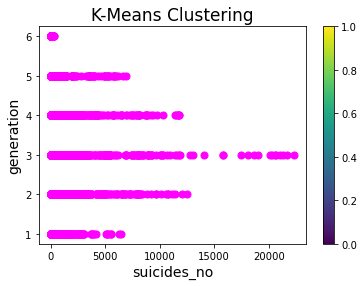

In [ ]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_data['suicides_no'],new_data['generation'],c='magenta',s=50)
ax.set_title('K-Means Clustering',fontsize=17)
ax.set_xlabel('suicides_no',fontsize=14)
ax.set_ylabel('generation',fontsize=14)
plt.colorbar(scatter)

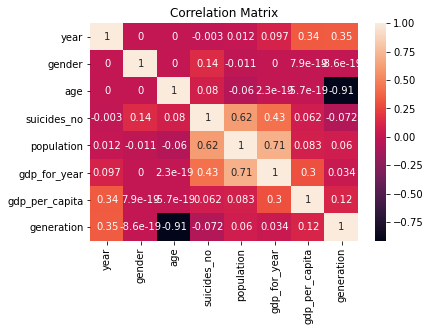

In [ ]:
import seaborn as sn
# plotting a correlation Matrix graph:

corrMatrix = new_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

## ✤ Train and Test Split - Ratio 80 / 20
+ Now let's split the data into a training set and a testing set. We'll train out model on the training set and then use the test set to evaluate the model. To do that, we need to import the following:

In [ ]:
# X and y arrays:
X = normalizeData.drop("generation", axis=1) # All columns without suicides_no
y = normalizeData["generation"] # Only column suicides_no

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(22128, 7)

In [ ]:
X_test.shape

(5532, 7)

In [ ]:
y_train.shape

(22128,)

In [ ]:
y_test.shape

(5532,)

**As we can see, there are  5532 observations in testing set, which constitute to 20% of 22128. Also, we can see that X data 7 columns, i.e. 7 explanatory variables, while y data has only 1 column.**

### ✤  1. Creating a Model of Linear Regression for Regression with preprocessed data:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
model_lin_reg = LinearRegression().fit(X_train,y_train)

In [ ]:
model_lin_reg

LinearRegression()

In [ ]:
print('Score is => ', model_lin_reg.score(X_test, y_test))
print('Intercept is => ',model_lin_reg.intercept_)
print('\n Coefficients are => ', model_lin_reg.coef_)

Score is =>  0.9843001988701494
Intercept is =>  0.0056883678249779026

 Coefficients are =>  [ 2.83251197e-03  1.08360583e-02 -7.44713027e-01 -3.94067648e-04
 -4.33167249e-07 -5.68836780e-03  2.73713532e-06]


**✤Let's predict by using above funciton, check all metrics, such as MAE,MSE,MAX,R2:**

In [ ]:
test_pred = model_lin_reg.predict(X_test)
print_evaluate(y_test, test_pred)

R-squared 0.984
MSE: 0.0
RMSE: 0.0
MAE: 0.0
MAX: 0.0


### ✤  2. Creating a Model of Logistic Regression for Regression with preporcessed data:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_log = LogisticRegression().fit(X_train,y_train) # fitting a model

#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=100,
# multi_class='auto', n_jobs=None, penalty='l2',random_state=None, solver='lbfgs', tol=0.0001, verbose=0,warm_start=False)

In [ ]:
{ col:[0] for col in X.columns }

{'year': [0],
 'gender': [0],
 'population': [0],
 'gdp_for_year': [0],
 'gdp_per_capita': [0],
 'age_1': [0],
 'age_2': [0],
 'age_3': [0],
 'age_4': [0],
 'age_5': [0],
 'age_6': [0],
 'generation_1': [0],
 'generation_2': [0],
 'generation_3': [0],
 'generation_4': [0],
 'generation_5': [0],
 'generation_6': [0]}

In [ ]:
# pr0perties from table:
example = {'year': [1987],
 'gender': [1],
 'population': [308000],
 'gdp_for_year': [2156624900],
 'gdp_per_capita': [796],
 'age_1': [0],
 'age_2': [0],
 'age_3': [0],
 'age_4': [1], # where age is 4 => range btw 35-54
 'age_5': [0],
 'age_6': [0],
 'generation_1': [0],
 'generation_2': [1], # generation is 'Silent'
 'generation_3': [0],
 'generation_4': [0],
 'generation_5': [0],
 'generation_6': [0]}
# creating 1 row and checking for suicides_no
example_df = pd.DataFrame(example)

In [ ]:
example_df

,year,gender,population,gdp_for_year,gdp_per_capita,age_1,age_2,age_3,age_4,age_5,age_6,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6
0,1987,1,308000,2156624900,796,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
# predicting a suicide_no:
model.predict(example_df)

array(['16'], dtype=int)


### ✤  3. Creating a Model using Decision Tree Classifier for Classification with preprocessed data:

In [ ]:
from sklearn.model_selection import train_test_split
# X and y arrays:
X = final_df.drop("gender", axis=1) # All columns without suicides_no
y = final_df["gender"] # Only column suicides_no

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
from sklearn import tree

In [ ]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print('Score is => ', model_tree.score(X_test, y_test))

Score is =>  0.8013015184381779


In [ ]:
from sklearn.metrics import classification_report

predicted = model_tree.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3478
           1       0.80      0.81      0.80      3437

    accuracy                           0.80      6915
   macro avg       0.80      0.80      0.80      6915
weighted avg       0.80      0.80      0.80      6915



**✤Let's predict by using above funciton, check all metrics, such as MAE,MSE,MAX,R2:**

In [ ]:
test_pred_3 = model_tree.predict(X_test)
print_evaluate(y_test, test_pred_3)

R-squared 0.205
MSE: 0.199
RMSE: 0.446
MAE: 0.199
MAX: 1


In [ ]:
# tree.plot_tree(model_tree) 

### ✤  4. Creating a Model using KNN Classifier for Classification with preprocessed data:

In [ ]:
# X and y arrays:
X = new_data.drop("year", axis=1) # All columns without suicides_no
y = new_data["year"] # Only column suicides_no
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
print(knn_model.score(X_test,y_test))


0.9985538684020245


**✤Let's predict by using above funciton, check all metrics, such as MAE,MSE,MAX,R2:**

In [ ]:
test_pred_4 = knn_model.predict(X_test)
print_evaluate(y_test, test_pred_4)

R-squared 0.997
MSE: 0.2
RMSE: 0.448
MAE: 0.014
MAX: 24


In [ ]:
test_pred_4 = knn_model.predict(X_test)
print_evaluate(y_test, test_pred_4)

R-squared 0.041
MSE: 788206.647
RMSE: 887.81
MAE: 223.139
MAX: 21628


Preliminary model score:
0.1393709327548807


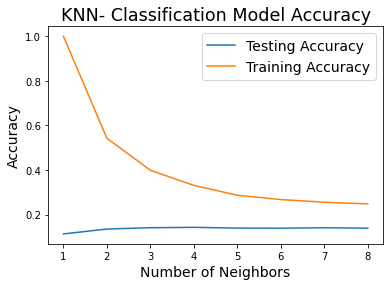

In [ ]:
# Plotting a Model Accuracy graph:
print("Preliminary model score:")
print(knn_model.score(X_test,y_test))

no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy
plt.title('KNN- Classification Model Accuracy', fontsize=17.5)
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend(fontsize=14)
plt.xlabel('Number of Neighbors',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.show()

## ✤ Collecting all data Model Evaluation Metrics in one Dataframe:

In [ ]:
Is_preprocessed = ['No', 'Yes.', 'Yes.', 'Yes.']
Score = ['64.89 %','79.6 %','80 %','98.1 %']
R_squared = ['0.649', ' 0.784', '0.861', '0.997']
MSE = ['5278.7', '0.402 ', ' 0.199', '0.245']
RMSE = ['72.18', '0. 836', '0.446', '0.448']
MAE = ['12006', '0.271', '0.199', '0.014']
MAX = ['2405', '37', '1', '24']

columns = {'Is_Preprocessed':Is_preprocessed,'Score':Score, 'R-squared':R_squared,'Mean_S_Error':MSE,'Root_Mean_S_Error':RMSE,'Mean_abs_Error':MAE,'Max_Error':MAX}

models=['KMeans Clustering','Linear Regression','Decision Tree Classif','KNN- Classification']
result = pd.DataFrame(data = columns,index = models)
result



,Is_Preprocessed,Score,R-squared,Mean_S_Error,Root_Mean_S_Error,Mean_abs_Error,Max_Error
KMeans Clustering,No,64.89 %,0.649,5278.7,72.18,12006,2405
Linear Regression,Yes.,79.6 %,0.784,0.402,0. 836,0.271,37
Decision Tree Classif,Yes.,80 %,0.861,0.199,0.446,0.199,1
KNN- Classification,Yes.,98.1 %,0.997,0.245,0.448,0.014,24


## ✤ Conclusion

✤ In general, These dataset about Suicide Rates  is was so huge - **27 820 observations and 12 columns**, about among 100 countries during 30 years from 1985 to 2015. 

+ After preprocessing, there was **only 8 columns with 22128 observations**
+ Also, I made dummy variables, and it became **17 columns same rows**

### ✤ Firstly, about preparing and preprocessing data:
**✤ I find out how many columns and rows was in this dataset, then I manipulated with my data by these steps=>** 
+ checking for duplicates, for NAN/empty values,
+ dropping null rows by functions like **drop()**,
+ also deleting some unnecessary columns **drop()**,
+ retrieving unique names for categorical data like generation,countries, age groups
+ in order to understand,where I can use dummy variables by creating them with function **get_dummies()**

### ✤ Secondly, about Normalisation and Standardisation:
+ ** At the beginning, I was normalising columns one by one, by formula by myself.**
+ ** After that, I used ready imported libraries called preprocessing, from it I used Normaliser() and StandardScaler() functions.**
+ **✤  By this way, I applied to the whole data, firstly I normalised. also I tried to standartising data.**

### ✤ Thirdly, about creating and comparing all Models:
+ I splitted my data for train and test data, with **ratio-80/20**
+ Training set has 22128 , while testing set has 5532 observations.


+ ✤**For Without preproccessed Data**, I created clustering model called "K-MEANS" and checked model evalustion by importing library "METRICS", also I plotted a Correlation Matrix by sns library.


+ ✤**For Preproccessed Data** =>

+ For **Regression**, I created **Linear  and Logistic Regression Models**, by **importing them from library SKLEARN**.

+ For **Classification**, I created **Decision Tree Classifier and KNN- Classification Models**, also by **importing library SKLEARN**.  

#### COMPARING METRICS btw Models:
+ From table, where I have collected all metrics, we can see that **Accuracy scores are higher **  in Classification models.


+ The **R^2  metric** provides an indication of the goodness of fit of a set of predictions. In statistics, IT is   coefficient of determination. It goes between 0 and 1.
+ So, by looking to Clustering and Regression models, it is also better in Classification models, , it is 0.86 and 0.97, it means than it is close to 1, good fit to the actual values.

 
+ By comparing MAE, Mean Absolute Error is the average of the absolute differences between predictions and actual values.
+ So, it shows how wrong the predictions were. In regression it was about 24 and 37, however Decision Tree Classifier Model had 1 , in good way it should be closer to 0, but here is good prediction.


+ Furthermore, we can compare **interaction btw MAE and RMSE**, according to table, everywhere RMSE is **0.3 greater** than MAE, it means that  algorithms were  very accurate, it will be reasonably good predictions.

**✤ In conclusion, I would use  "Decision Tree Classifier Model", it is a little bit better than other models!.**

### ✤ As a result, I have accuracy score increased from 64.89 % to 98 %

✤ To conclude, it was a huge experience for me to analyse this Worldwide Suicide Rates from 1985-2015. Finally, I understand a lot of things,that will help me in the future!)